<a href="https://colab.research.google.com/github/MariannaMois/pet_project/blob/master/bicycle_korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Анализ факторов и прогноз проката велосипедов

Работаем с [данными](https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv) сервиса проката велосипедов в Корее за год.

Описание данных:
- Date - дата;
- Rented Bike Count - сколько велосипедов было взято в прокат, целевая переменная;
- Hour - час дня;
- Temperature - температура воздуха в градусах Цельсия;
- Humidity - влажность воздуха;
- Wind Speed - скорость ветра в м/с;
- Visibility - мера различимости объектов на расстоянии в 10 метров;
- Dew point temperature -  температура, зарегистрированная в начале дня, в градусах Цельсия;
- Solar Radiation - интенсивность солнечного света;
- Rainfall - количество осадков в мм;
- Snowfall - количество выпавшего снега в мм;
- Seasons - время года;
- Holiday - является ли день праздничным;
- Functioning Day - маркер, работал ли сервис проката в указанное время.

**Цель работы**: изучить данные и выявить факторы влияющие на спрос велосипедов.

**Задачи**:  
1) Провести предобработку данных: проверить данные на наличие выбросов, ошибочных значений, пропусков, дубликатов и некорректных типов.  
2) Провести EDA: реализовать все уровни анализа (одномерные/многомерные) с использованием визуализаций, изучить распределения и взаимосвязь признаков.  
3) Подготовить данные для построения модели (кодирование признаков, масштабирование, разбиение выборки на обучающую и тестовую).  
4) Реализовать базовую регрессионную модель прогнозирования количества велосипедов, взятых в прокат.  
5) При помощи инструментов Feature Selection и подбора гиперпараметров подобрать наилучшую прогнозную модель по adjusted R2.

Целевой параметр качества модели: adjusted R2 не менее 89%.

Во всех действиях, содержащих случайную составляющую, фиксировалось `random_state=42`.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/seoul_bike_data.csv'
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.columns = df.columns.str.replace(r'\(.*\)', '', regex=True).str.strip()

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
print("Пропущенные значения в столбцах:")
print(df.isnull().sum())

print("\nКоличество дубликатов:", df.duplicated().sum())

Пропущенные значения в столбцах:
Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

Количество дубликатов: 0


Пропущенные значения отсутствуют.
Дубликаты отсутствуют.

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Определяем выбросы
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print("Количество выбросов в каждом числовом столбце:")
print(outliers)

Количество выбросов в каждом числовом столбце:
Rented Bike Count        158
Hour                       0
Temperature                0
Humidity                   0
Wind speed               161
Visibility                 0
Dew point temperature      0
Solar Radiation          641
Rainfall                 528
Snowfall                 443
dtype: int64


In [ ]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


Некоторые столбцы содержат выбросы ('Rented Bike Count', 'Wind speed', 'Solar Radiation', 'Rainfall', 'Snowfall').

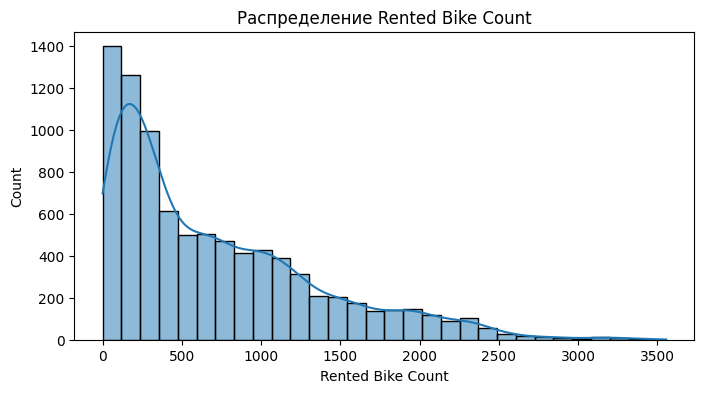

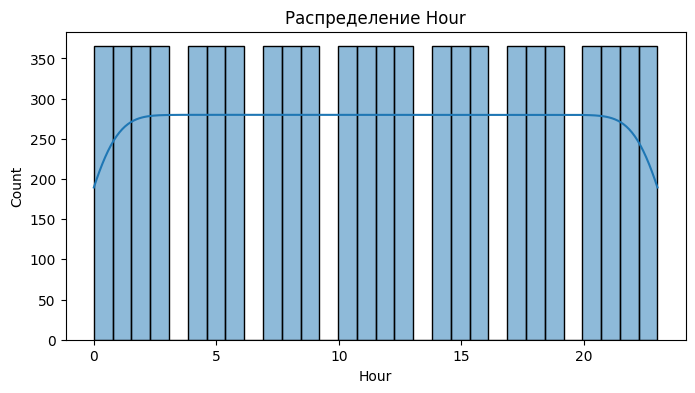

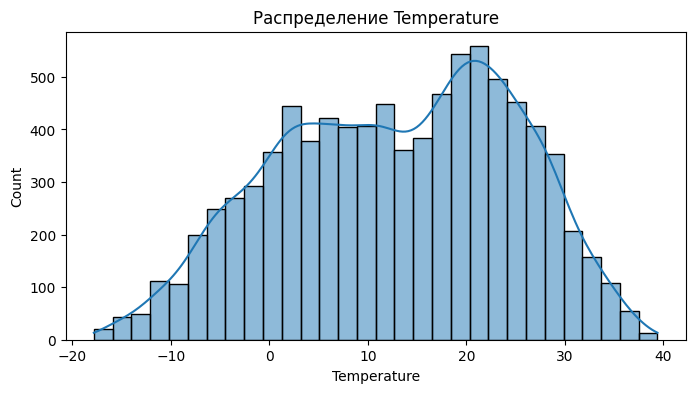

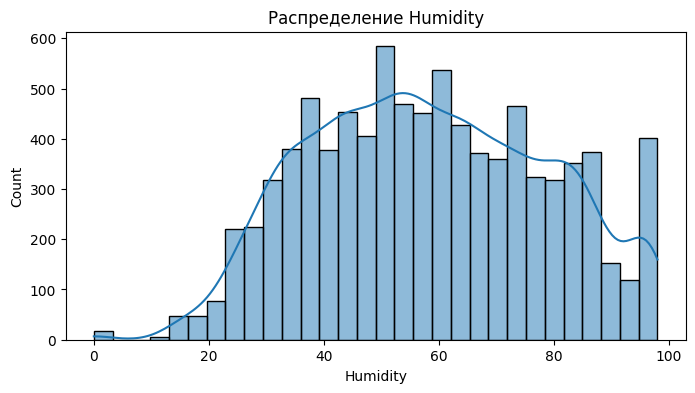

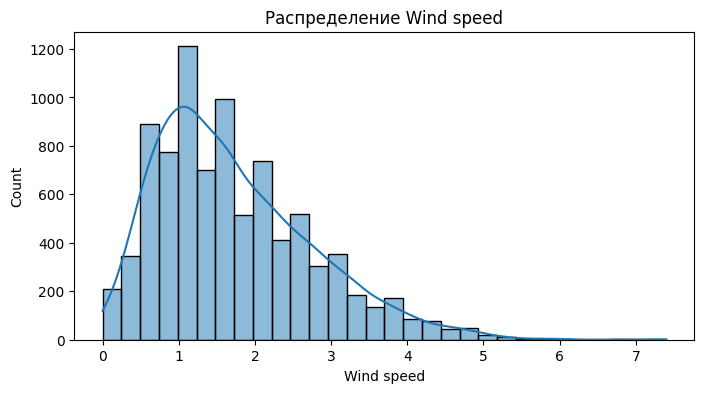

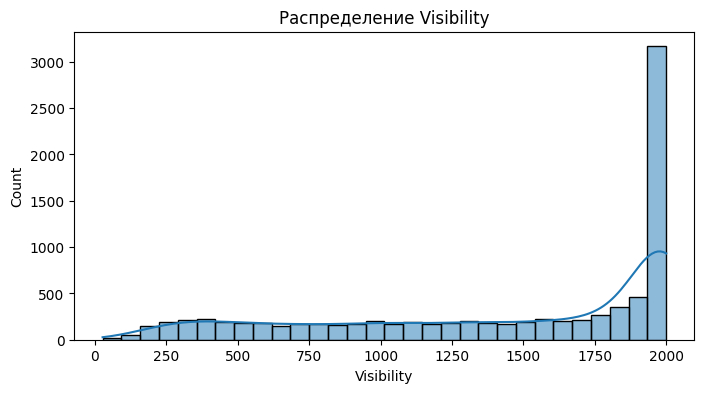

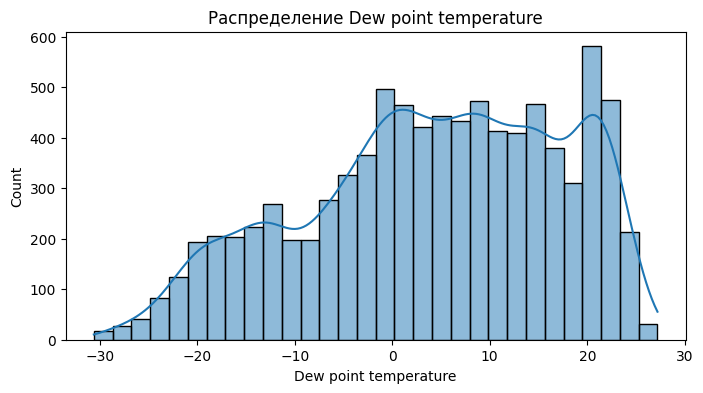

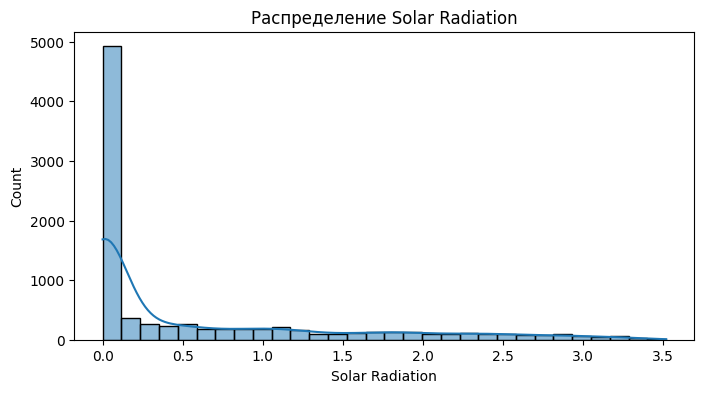

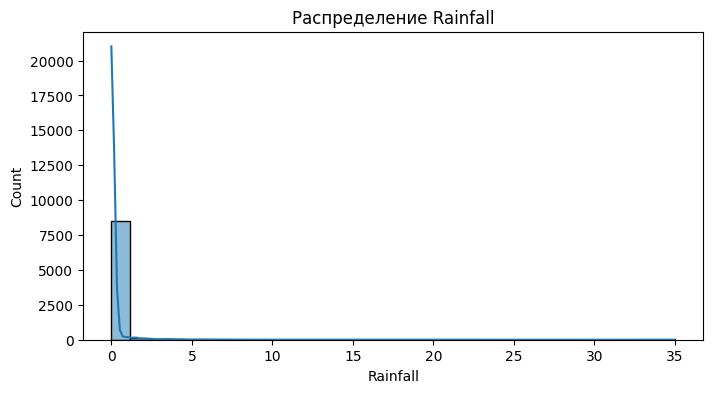

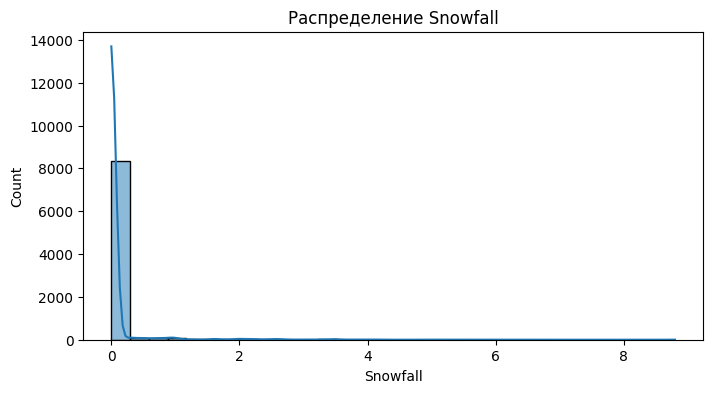

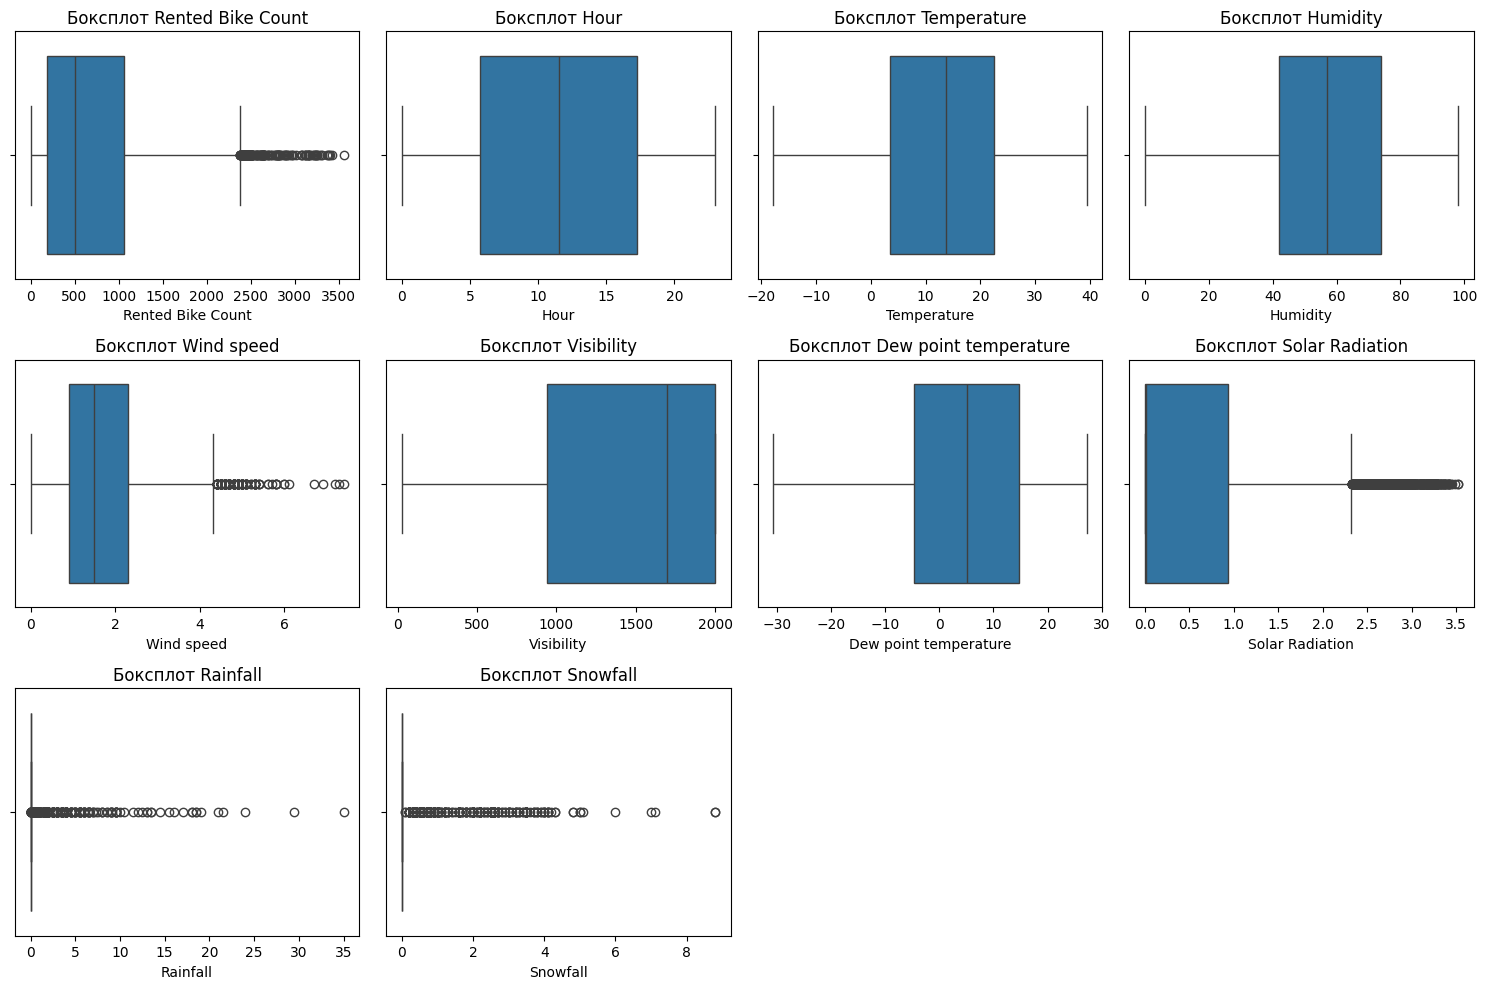

In [ ]:
# Гистограммы числовых признаков
for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Распределение {column}')
    plt.show()

# Ящик с усами для обнаружения выбросов
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Боксплот {column}')
plt.tight_layout()
plt.show()

Распределения некоторых признаков скошены.
Выбросы в данных связаны с природой данных (например, редкие высокие значения осадков или солнечной радиации).

# EDA

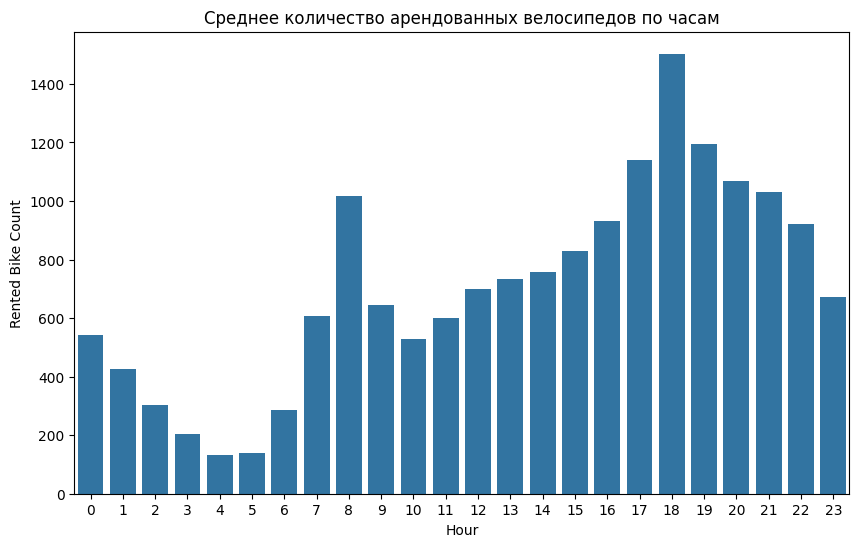

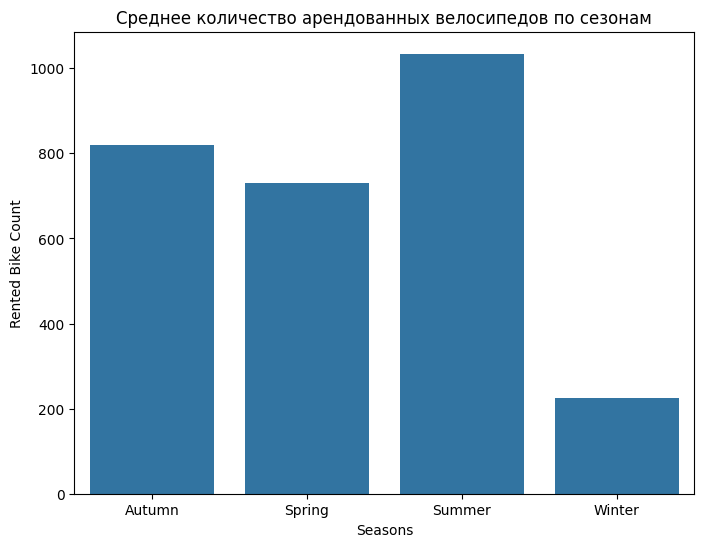

In [ ]:
# Распределение проката велосипедов по времени суток
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=df.groupby('Hour')['Rented Bike Count'].mean().reset_index())
plt.title('Среднее количество арендованных велосипедов по часам')
plt.show()

# Распределение проката по временам года
plt.figure(figsize=(8, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df.groupby('Seasons')['Rented Bike Count'].mean().reset_index())
plt.title('Среднее количество арендованных велосипедов по сезонам')
plt.show()

Наибольший спрос на велосипеды приходится на дневные и вечерние часы.
Лето и осень — сезоны с наибольшим спросом на велосипеды.

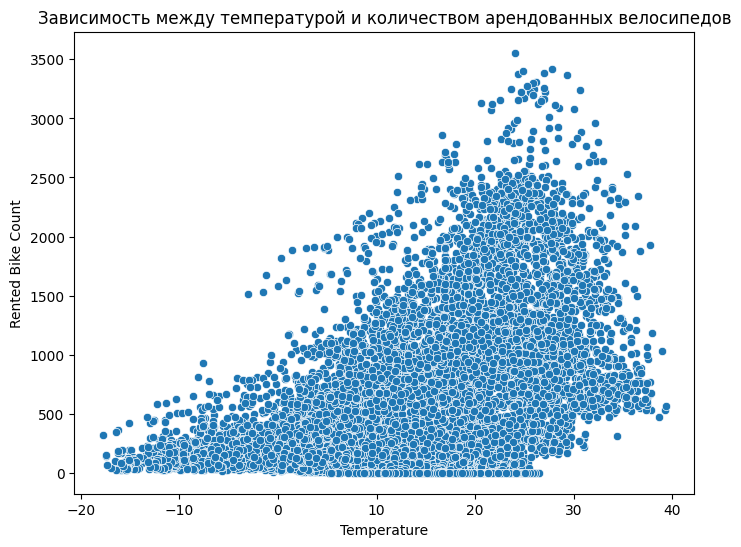

In [ ]:
# Взаимосвязь температуры и количества арендованных велосипедов
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Rented Bike Count', data=df)
plt.title('Зависимость между температурой и количеством арендованных велосипедов')
plt.show()

С повышением температуры наблюдается увеличение количества арендованных велосипедов.

In [ ]:
# Кодирование бинарных признаков
df['Holiday'] = df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding для признака 'Seasons'
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)

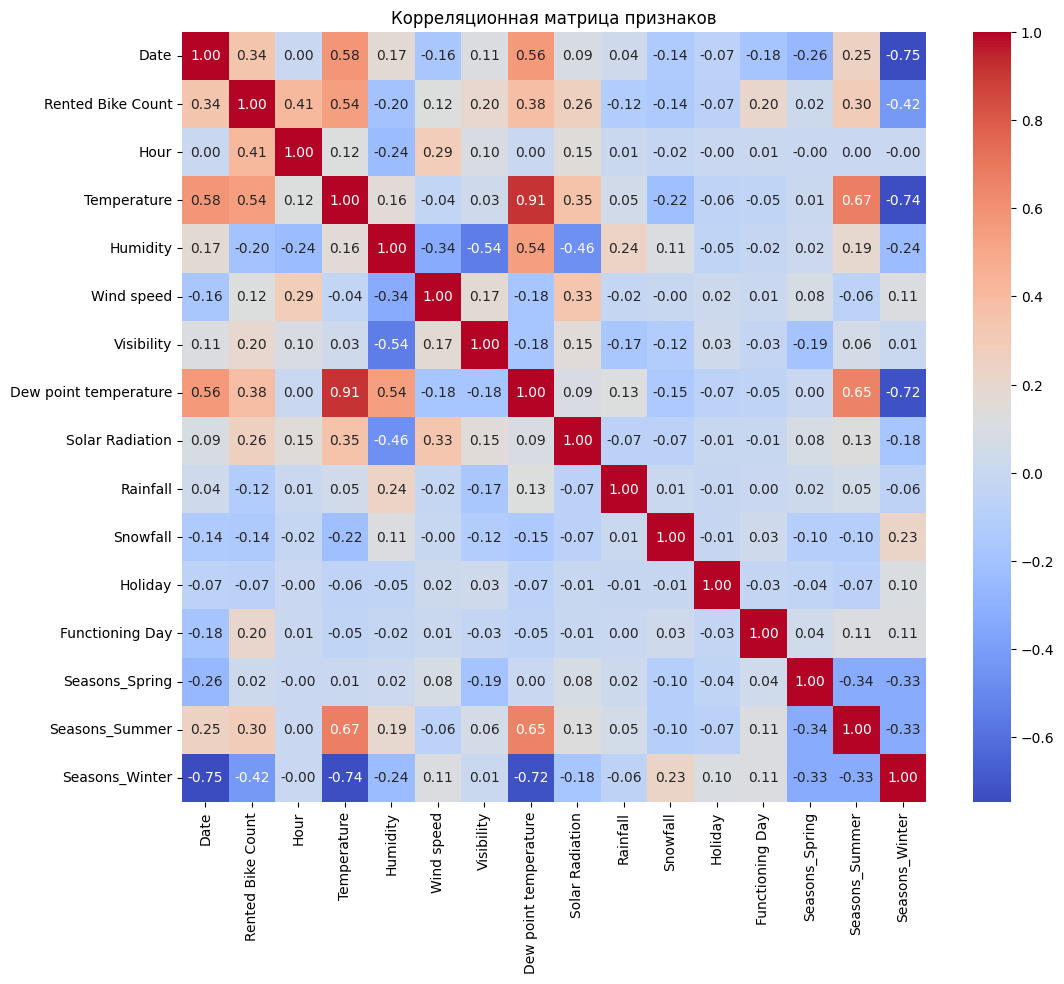

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [ ]:
# Извлечение месяца и дня недели
df['Month'] = df['Date'].dt.month
df['Day of Week'] = df['Date'].dt.dayofweek

In [ ]:
df = df.drop(['Date'], axis=1)

# Целевая переменная
y = df['Rented Bike Count']

# Матрица признаков
X = df.drop('Rented Bike Count', axis=1)

# Масштабирование признаков

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Построение базовой регрессионной модели

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

In [ ]:
print(f"R² модели линейной регрессии: {r2_lr:.4f}")
print(f"Adjusted R² модели линейной регрессии: {adjusted_r2_lr:.4f}")

R² модели линейной регрессии: 0.5356
Adjusted R² модели линейной регрессии: 0.5314


Базовая модель линейной регрессии показала Adjusted R² около 0,5314.
Это значение ниже требуемого уровня 89%, необходимо улучшить модель.

# Улучшение модели с помощью Feature Selection и подбора гиперпараметров

Подбор параметров с помощью GridSearchCV

Ridge Regression с кросс-валидацией

In [ ]:
# Параметры для подбора
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [ ]:
ridge = Ridge(random_state=42)
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='r2')

In [ ]:
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [ ]:
# Лучшие параметры
print("Лучшие параметры для Ridge Regression:", grid_search_ridge.best_params_)

Лучшие параметры для Ridge Regression: {'alpha': 10}


In [ ]:
# Оценка на тестовой выборке
y_pred_ridge = grid_search_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - p - 1)

print(f"Adjusted R² модели Ridge Regression: {adjusted_r2_ridge:.4f}")

Adjusted R² модели Ridge Regression: 0.5314


Random Forest Regressor

In [ ]:
# Параметры для подбора
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

In [ ]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
# Лучшие параметры
print("Лучшие параметры для Random Forest:", grid_search_rf.best_params_)

Лучшие параметры для Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
# Оценка на тестовой выборке
y_pred_rf = grid_search_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print(f"Adjusted R² модели Random Forest: {adjusted_r2_rf:.4f}")

Adjusted R² модели Random Forest: 0.9048


In [ ]:
# Кросс-валидация на всем наборе данных
cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print(f"Среднее значение R² на кросс-валидации: {np.mean(cv_scores):.4f}")
print(f"Стандартное отклонение R² на кросс-валидации: {np.std(cv_scores):.4f}")

Среднее значение R² на кросс-валидации: 0.9055
Стандартное отклонение R² на кросс-валидации: 0.0076


Gradient Boosting Regressor

In [ ]:
# Параметры для подбора
param_grid_gbr = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='r2', n_jobs=-1)


In [ ]:
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
# Лучшие параметры
print("Лучшие параметры для Gradient Boosting Regressor:", grid_search_gbr.best_params_)

Лучшие параметры для Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
# Оценка на тестовой выборке
y_pred_gbr = grid_search_gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
adjusted_r2_gbr = 1 - (1 - r2_gbr) * (n - 1) / (n - p - 1)

In [ ]:
print(f"Adjusted R² модели Gradient Boosting Regressor: {adjusted_r2_gbr:.4f}")

Adjusted R² модели Gradient Boosting Regressor: 0.9292


In [ ]:
# Кросс-валидация на всем наборе данных
cv_scores = cross_val_score(grid_search_gbr.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print(f"Среднее значение R² на кросс-валидации: {np.mean(cv_scores):.4f}")
print(f"Стандартное отклонение R² на кросс-валидации: {np.std(cv_scores):.4f}")

Среднее значение R² на кросс-валидации: 0.9361
Стандартное отклонение R² на кросс-валидации: 0.0037


На основе результатов кросс-валидации можно выбрать наилучшую прогнозную модель - Gradient Boosting Regressor, R² на кросс-валидации 0,9361.